In [126]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.finance import candlestick2_ohlc, candlestick_ohlc
%matplotlib inline

from __future__ import division

#### Stock Name and Source

For more information on available sources:
http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [127]:
stock = 'SCB.BK'
source = 'yahoo'

#### Index to Benchmark Against

In [128]:
index = 'TDEX.BK'

#### Risk-free Rate

In [129]:
rf = 0.0025

## Should be doing a proper calculation here
## But difference should be negligible
daily_rf = rf / 365

daily_rf

6.849315068493151e-06

#### Set start and end date

In [130]:
end = datetime.datetime.today()
start = datetime.datetime(2000,1,1)

In [131]:
f = web.DataReader(stock, source, start, end)
ind = web.DataReader(index, source, start, end)

# Let's clear NaN rows
f = f.dropna()
ind = ind.dropna()

## Data Preview

#### Stock

In [132]:
f.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,45.50,46.00,45.25,45.75,29.346634,3746100.0
2000-01-05,43.50,44.25,43.00,43.50,27.903353,2736300.0
2000-01-06,43.75,43.75,42.25,42.50,27.261906,1159100.0
2000-01-07,43.00,44.00,42.50,43.75,28.063723,975000.0
2000-01-10,44.50,45.25,43.75,43.75,28.063723,1730500.0
2000-01-11,44.25,44.50,43.00,43.00,27.582632,1053900.0
2000-01-12,42.75,43.75,42.75,43.75,28.063723,543000.0
2000-01-13,43.50,44.00,43.25,43.50,27.903353,468400.0
2000-01-14,44.00,44.50,43.75,44.50,28.544811,889300.0


In [133]:
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4455 entries, 2000-01-04 to 2017-11-14
Data columns (total 6 columns):
Open         4455 non-null float64
High         4455 non-null float64
Low          4455 non-null float64
Close        4455 non-null float64
Adj Close    4455 non-null float64
Volume       4455 non-null float64
dtypes: float64(6)
memory usage: 243.6 KB


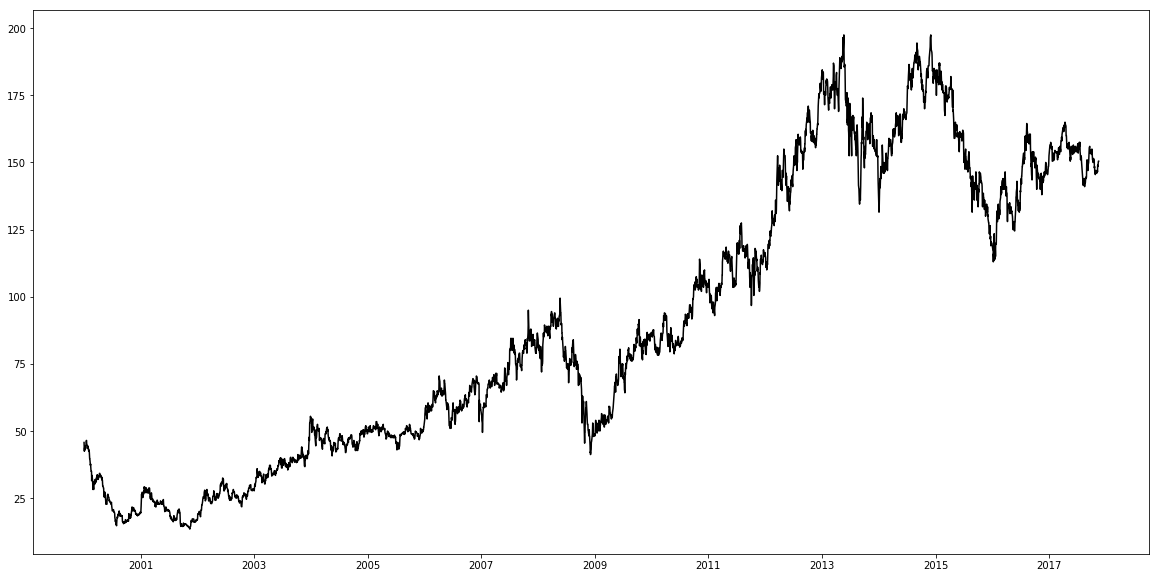

In [134]:
plt.figure(figsize=(20,10))
plt.plot(f.index, f.Close, 'black')

#### Benchmark

In [135]:
ind.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-13,5.83,5.85,5.80,5.84,5.019063,10212700.0
2007-09-14,5.86,5.92,5.86,5.87,5.044846,13329100.0
2007-09-17,5.90,5.90,5.80,5.80,4.984686,7414000.0
2007-09-18,5.80,5.83,5.80,5.81,4.993280,2870200.0
2007-09-19,5.92,5.94,5.88,5.90,5.070629,11181400.0
2007-09-20,5.92,5.93,5.90,5.93,5.096411,6054000.0
2007-09-21,5.91,6.04,5.91,6.04,5.190948,12407800.0
2007-09-24,6.10,6.20,6.06,6.15,5.285486,12083000.0
2007-09-25,6.14,6.14,6.07,6.09,5.233921,12291600.0


In [136]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2443 entries, 2007-09-13 to 2017-11-14
Data columns (total 6 columns):
Open         2443 non-null float64
High         2443 non-null float64
Low          2443 non-null float64
Close        2443 non-null float64
Adj Close    2443 non-null float64
Volume       2443 non-null float64
dtypes: float64(6)
memory usage: 133.6 KB


#### Stock vs Benchmark (Pre-processing)

In [137]:
stock_pct = f.copy()
stock_pct['Close Pct Change'] = stock_pct.Close.pct_change()
stock_pct['Cumulative Pct Change'] = stock_pct['Close Pct Change'].cumsum()

In [138]:
ind_pct = ind.copy()
ind_pct['Close Pct Change'] = ind_pct.Close.pct_change()
ind_pct['Cumulative Pct Change'] = ind_pct['Close Pct Change'].cumsum()

## General Statistics

#### Daily Returns

In [140]:
stock_pct['Close Pct Change'].describe()

count    4454.000000
mean        0.000515
std         0.022291
min        -0.207407
25%        -0.011142
50%         0.000000
75%         0.011078
max         0.204545
Name: Close Pct Change, dtype: float64

#### Correlation with Benchmark

In [157]:
agg_df_pre = pd.merge(stock_pct, ind_pct, how='right', left_index=True, right_index=True)

In [158]:
agg_df = agg_df_pre.dropna()[['Close Pct Change_x', 'Close Pct Change_y']]
agg_df.columns = ['Stock','Benchmark']
agg_df.head()

,Stock,Benchmark
Date,,
2007-09-14,0.006757,0.005137
2007-09-17,-0.020134,-0.011925
2007-09-18,-0.006849,0.001724
2007-09-19,0.027586,0.015491
2007-09-20,0.000000,0.005085


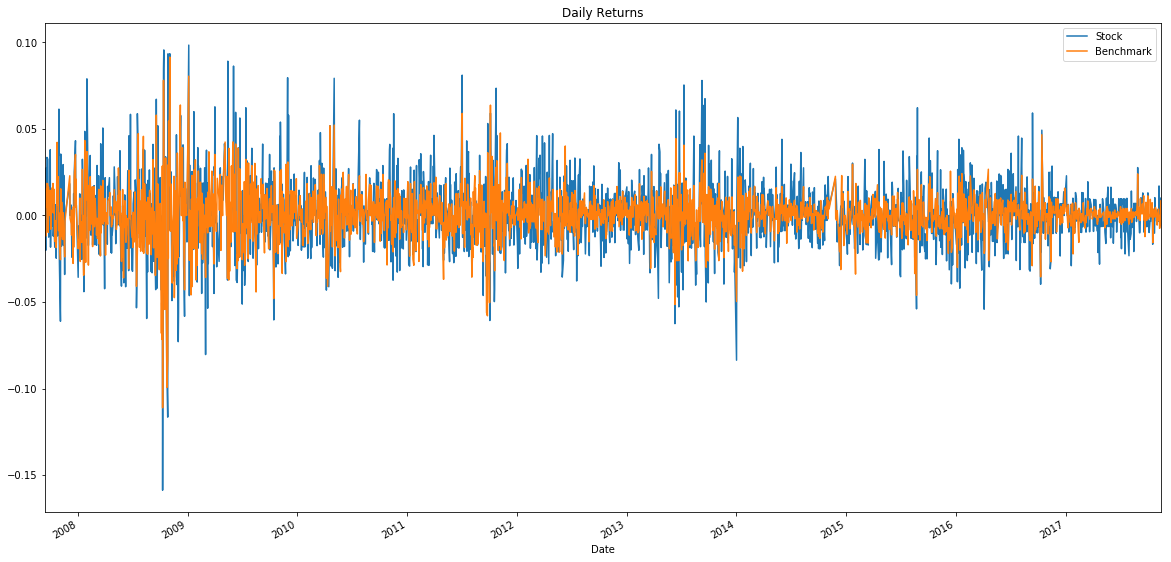

In [163]:
agg_df.plot(kind='line', figsize=(20,10), title='Daily Returns')

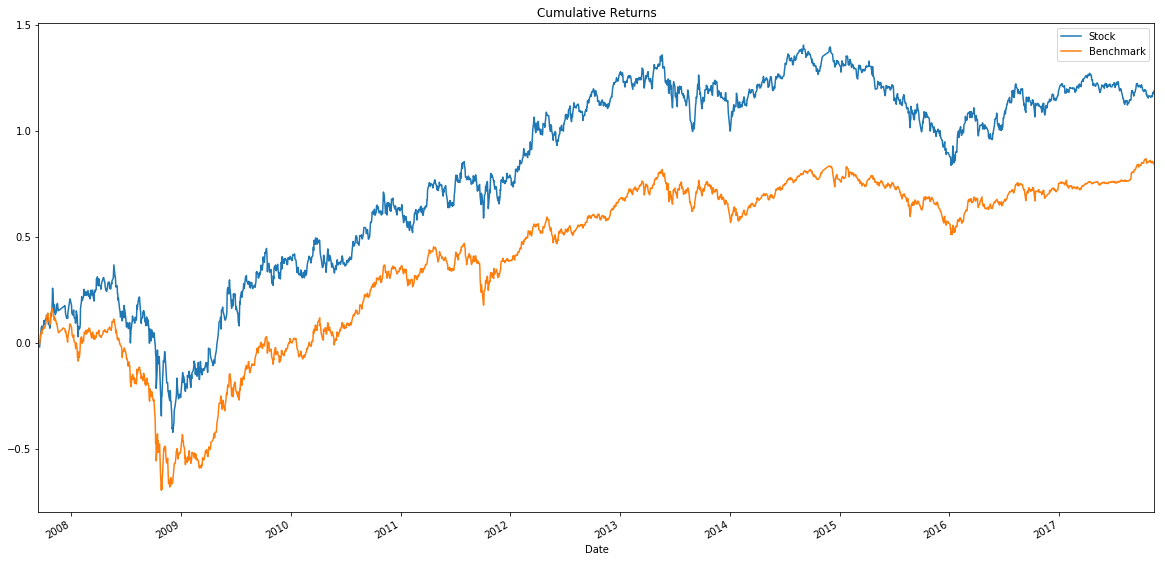

In [166]:
cum_rf = pd.concat([agg_df.Stock.cumsum(), agg_df.Benchmark.cumsum()], axis=1)
cum_rf.plot(figsize=(20,10), title='Cumulative Returns')

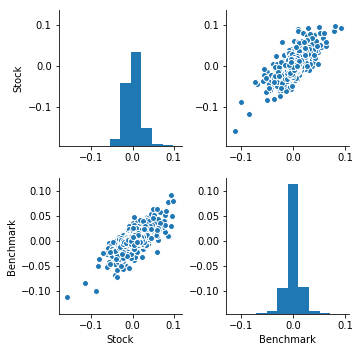

In [173]:
sns.pairplot(agg_df)

#### Compute Beta

In [141]:
print 'Beta : %.4f' % ((stock_pct['Close Pct Change'].mean() - daily_rf)/
                       (ind_pct['Close Pct Change'].mean() - daily_rf))

Beta : 1.5078


#### Sharpe Ratio

In [174]:
print 'Sharpe Ratio : %.4f' % ((stock_pct['Close Pct Change'].mean() - daily_rf)/
                       (stock_pct['Close Pct Change'].std()))

Sharpe Ratio : 0.0228


#### Auto-Correlation

In [177]:
for i in range(1, 31):
    print 'AutoCorre (lag=%d) : %.4f' % (i, agg_df.Stock.autocorr(lag = i))

AutoCorre (lag=1) : 0.0288
AutoCorre (lag=2) : -0.0476
AutoCorre (lag=3) : -0.0237
AutoCorre (lag=4) : -0.0400
AutoCorre (lag=5) : -0.0198
AutoCorre (lag=6) : -0.0534
AutoCorre (lag=7) : -0.0411
AutoCorre (lag=8) : -0.0459
AutoCorre (lag=9) : -0.0005
AutoCorre (lag=10) : 0.0325
AutoCorre (lag=11) : -0.0424
AutoCorre (lag=12) : 0.0296
AutoCorre (lag=13) : 0.0571
AutoCorre (lag=14) : 0.0320
AutoCorre (lag=15) : -0.0430
AutoCorre (lag=16) : -0.0049
AutoCorre (lag=17) : -0.0232
AutoCorre (lag=18) : 0.0235
AutoCorre (lag=19) : -0.0051
AutoCorre (lag=20) : -0.0816
AutoCorre (lag=21) : -0.0134
AutoCorre (lag=22) : -0.0104
AutoCorre (lag=23) : -0.0141
AutoCorre (lag=24) : 0.0187
AutoCorre (lag=25) : 0.0807
AutoCorre (lag=26) : 0.0671
AutoCorre (lag=27) : 0.0226
AutoCorre (lag=28) : 0.0254
AutoCorre (lag=29) : -0.0188
AutoCorre (lag=30) : -0.0186
